In [ ]:
from utils import *
from LearnabilityLock import *
from model import ResNet, DenseNet
import dataset
import matplotlib.pyplot as plt
# from IPython.core.interactiveshell import InteractiveShell
# InteractiveShell.ast_node_interactivity = "all"

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

%cd /content/gdrive/My Drive/L-Lock

Mounted at /content/gdrive
/content/gdrive/My Drive/L-Lock


In [1]:
train_loader,test_loader = dataset.load_cifar10(256)

In [ ]:
base_model = ResNet.ResNet18(10)
base_model = base_model.cuda()


In [4]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=base_model.parameters(), lr=0.05, weight_decay=0.001, momentum=0.9)
scheduler = torch.optim.lr_scheduler.CosineAnnealingLR(optimizer, T_max=20, eta_min=0.01)

In [ ]:
params = {'in_shape':32, 
               'n_channel':3, 
               'n_class':10,
               'mid_planes':32}
lock = iResLock(lock_params = params, epsilon=16/255)

In [ ]:
# weights = lock.read_weights( 'iresnet','pretrained_weights/cifar10_iresnet_e16',)
# lock.setup(weights)

reading success!
Overwriting the weights...


In [ ]:
lock.train(base_model, train_loader, optimizer, criterion, scheduler, I=20, J=1, learning_rate = 0.1)

Accuracy 32.14


100%|██████████| 196/196 [06:11<00:00,  1.90s/it]


Accuracy 37.54
Accuracy 46.42


100%|██████████| 196/196 [06:12<00:00,  1.90s/it]


Accuracy 50.87
Accuracy 50.25


100%|██████████| 196/196 [06:09<00:00,  1.88s/it]


Accuracy 54.69
Accuracy 41.77


100%|██████████| 196/196 [06:09<00:00,  1.89s/it]


Accuracy 49.84
Accuracy 47.19


100%|██████████| 196/196 [06:10<00:00,  1.89s/it]


Accuracy 54.20
Accuracy 45.51


100%|██████████| 196/196 [06:09<00:00,  1.89s/it]


Accuracy 58.09
Accuracy 64.86


100%|██████████| 196/196 [06:10<00:00,  1.89s/it]


Accuracy 75.20
Accuracy 68.42


100%|██████████| 196/196 [06:11<00:00,  1.90s/it]


Accuracy 76.90
Accuracy 84.23


100%|██████████| 196/196 [06:13<00:00,  1.91s/it]


Accuracy 88.57
Accuracy 94.79


100%|██████████| 196/196 [06:12<00:00,  1.90s/it]


Accuracy 95.61


In [ ]:
makedir('./pretrained_weights/cifar10_iresnet_e8_plus1')
lock.save('iresnet','pretrained_weights/cifar10_iresnet_e8_plus1')

Weights saved as pretrained_weights/cifar10_iresnet_e16_plus1/iresnet


In [2]:
eval_idx, total, correct = 0, 0, 0
for i, (images, labels) in enumerate(test_loader):
    images, labels = images.cuda(), labels.cuda()
    # images = lock.lock(images, labels).cuda()
    with torch.no_grad():
        logits = base_model(images)
        _, predicted = torch.max(logits.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
acc = correct / total
print('Accuracy %.2f' % (acc*100))


Accuracy 18.70


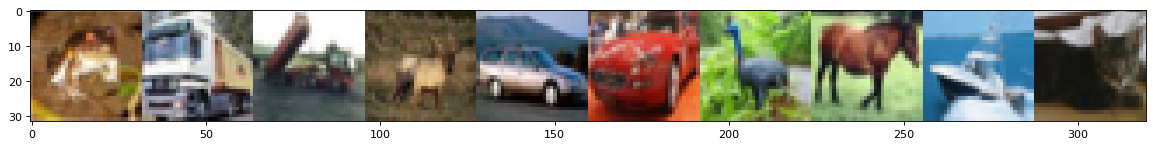

In [ ]:
# Show random images and noises attached
data_iter = iter(train_loader)
imgs, lbs = next(data_iter)
imgs = imgs.cuda()
lbs = lbs.cuda()
show_images(imgs[:10])

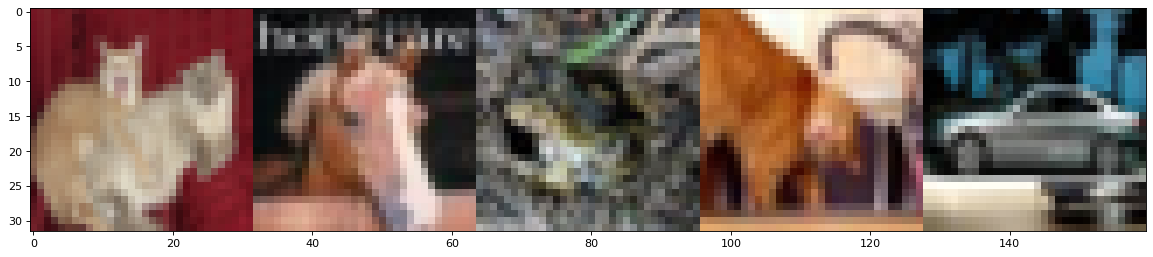

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


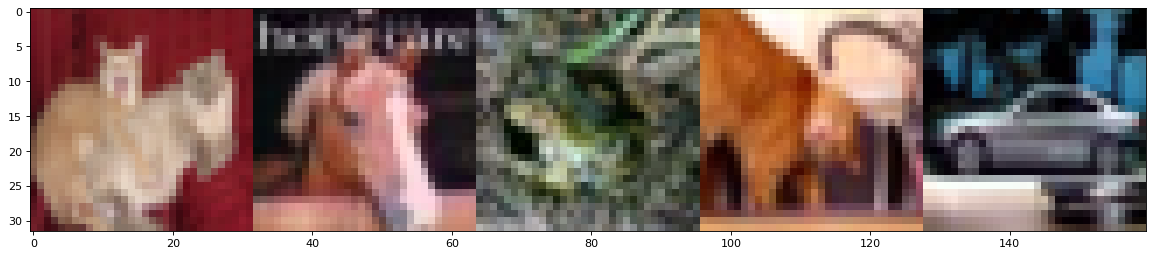

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


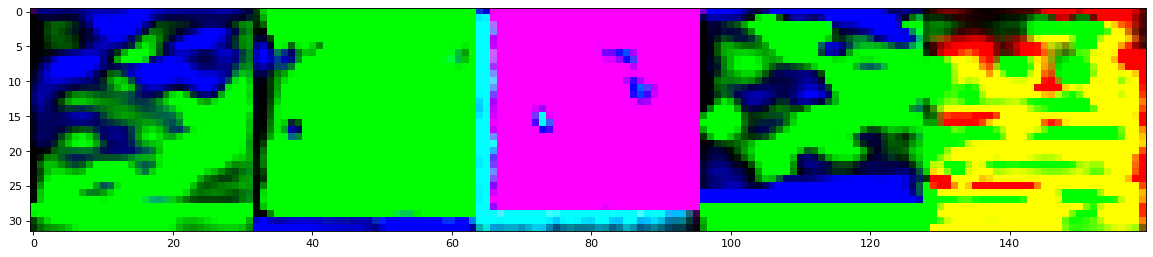

In [ ]:
imgs, lbs = next(data_iter)
imgs = imgs.cuda()
lbs = lbs.cuda()
show_images(imgs[:5])
pimages = lock.lock(imgs[:5], lbs[:5]).cuda()
rimages = lock.unlock(pimages, lbs[:5]).cuda()
pimages = pimages.detach()
rimages = rimages.detach()
show_images(pimages)
show_images(((imgs[:5].cpu()-pimages.cpu()))*255)
# show_images(rimages)
# show_images(((imgs[:5].cpu()-rimages.cpu()))*255)